# Explore population outbreaks in Fringilla insect data 

Due to high number of missing values, this line of research focusses on the years from 1998 to 2020.

In [1]:
# import libraries
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
sns.set_theme(
    style="darkgrid",
    color_codes=True,
    palette='Dark2',
)

In [2]:
pkl_files = ['species.pkl', 'species_long.pkl', 'species_summed.pkl']

# define import function
def import_pickled_data():
    dummy = []
    for file in pkl_files:
        with open('../../data/'+file, 'rb') as f:
            dummy.append(pkl.load(f))
    return dummy

species, species_long, species_summed = import_pickled_data()

In [3]:
# get data into tidy form!
# i.e., single dataframe with variables as columns and single observation as row

sheets = ['Vanessa atalanta', 'Vanessa cardui', 'Inachis io', 'Issoria lathonia', 'Aglais urticae',
          'Aporia crataegi', 'Apatura ilia', 'Aphantopus hyperanthus', 'Araschnia levana', 'Nymphalis antiopa',
          'Nymphalis polychloros', 'Nymphalis xanthomelas', 'Papilio machaon', 'Polygonia c-album', 'Pararge aegeria']

all_species = pd.DataFrame()
for s in sheets:
    df = species_summed[s]
    df['species'] = s # add species column
    df = df[['species', 'datetime', 'count', 'Temp', 'Wind', 'Cloud']] # select columns
    all_species = pd.concat([all_species, df]) # put final df together

In [4]:
# data processing...

# rename columns
all_species.rename(
    columns={'Temp': 'tmp', 'Wind': 'wind', 'Cloud':'cloud'}, 
    inplace=True
)

# specify time period (1998-2020)
# use datetime attribute "dt" to access the datetime components!
all_species = all_species[all_species['datetime'].dt.year >= 1998]

# and reset index
all_species.reset_index(drop=True, inplace=True)

# add year column
all_species['year'] = all_species['datetime'].dt.year

display(all_species)

,species,datetime,count,tmp,wind,cloud,year
0,Vanessa atalanta,1998-04-01,NaN,NaN,NaN,NaN,1998
1,Vanessa atalanta,1998-04-02,NaN,NaN,NaN,NaN,1998
2,Vanessa atalanta,1998-04-03,NaN,NaN,NaN,NaN,1998
3,Vanessa atalanta,1998-04-04,NaN,NaN,NaN,NaN,1998
4,Vanessa atalanta,1998-04-05,NaN,NaN,NaN,NaN,1998
...,...,...,...,...,...,...,...
74170,Pararge aegeria,2020-10-28,NaN,NaN,NaN,NaN,2020
74171,Pararge aegeria,2020-10-29,NaN,NaN,NaN,NaN,2020
74172,Pararge aegeria,2020-10-30,NaN,NaN,NaN,NaN,2020
74173,Pararge aegeria,2020-10-31,NaN,NaN,NaN,NaN,2020


### Outbreak index

In [38]:
# sum up counts in each year
outbreaks = all_species.groupby(['species', 'year'], as_index=False)['count'].sum()

# compute total average count (across all years)
avg_count = outbreaks.groupby(['species'])['count'].mean()
# https://stackoverflow.com/questions/62490392/how-to-apply-log-on-negative-values-based-upon-some-conditions-in-python

# add average count to df
outbreaks = outbreaks.set_index(['species'])
outbreaks['avg'] = avg_count
outbreaks = outbreaks.reset_index()

# computing outbreak index with zero reflecting the total average count
outbreaks['log index'] = outbreaks['count'] - outbreaks['avg']

display(outbreaks)

,species,year,count,avg,log index
0,Aglais urticae,1998,2.0,25.782609,-23.782609
1,Aglais urticae,1999,1.0,25.782609,-24.782609
2,Aglais urticae,2000,2.0,25.782609,-23.782609
3,Aglais urticae,2001,8.0,25.782609,-17.782609
4,Aglais urticae,2002,77.0,25.782609,51.217391
...,...,...,...,...,...
340,Vanessa cardui,2016,39.0,204.695652,-165.695652
341,Vanessa cardui,2017,6.0,204.695652,-198.695652
342,Vanessa cardui,2018,11.0,204.695652,-193.695652
343,Vanessa cardui,2019,3270.0,204.695652,3065.304348


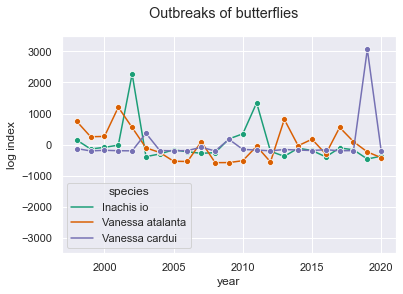

In [46]:
# plotting
size = 3500
data = outbreaks[
    (outbreaks['species'] == 'Vanessa atalanta') | 
    (outbreaks['species'] == 'Vanessa cardui') |
    (outbreaks['species'] == 'Inachis io')
]

fig, ax = plt.subplots()
sns.lineplot(data=data, x='year', y='log index', hue='species', marker='o', ax=ax)
ax.set_ylim(top=size, bottom=-size)
fig.suptitle('Outbreaks of butterflies')
fig.savefig('../figs/kaliningrad/outbreaks_log-index_per-year.png', 
            dpi=600, bbox_inches='tight')

In [35]:
outbreaks_va_vc = all_species[
    (all_species['species'] == 'Vanessa atalanta') | (all_species['species'] == 'Vanessa cardui')
].reset_index(drop=True)

yearly_counts = []
for s in sheets:
    ycnt = all_species

In [ ]:
# compute new df with weekly count (add count and number of week)
all_species_weekly = pd.DataFrame()
for s in sheets:
    